# Single Variable Training

# Training With Old Dataset & Computed Input Feature

# ** Note! : This Old Dataset Have Over 100% Event

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [51]:
df = pd.read_csv('../LSTM_Ready_Dataset_Old.csv')
df

,timestamp,node_cpu_usage_10.35.29.108:10250,node_cpu_usage_10.35.29.109:10250,node_cpu_usage_10.35.29.110:10250,node_mem_usage_10.35.29.108:10250,node_mem_usage_10.35.29.109:10250,node_mem_usage_10.35.29.110:10250,node_cpu_req_unknown,node_cpu_req_aj-aung-k8s-master,node_cpu_req_aj-aung-k8s-worker1,...,node_mem_req_aj-aung-k8s-master,node_mem_req_aj-aung-k8s-worker1,node_mem_req_aj-aung-k8s-worker2,node_cpu_cap_aj-aung-k8s-master,node_cpu_cap_aj-aung-k8s-worker1,node_cpu_cap_aj-aung-k8s-worker2,node_mem_cap_aj-aung-k8s-master,node_mem_cap_aj-aung-k8s-worker1,node_mem_cap_aj-aung-k8s-worker2,cluster_pods_pending
0,2024-01-01 00:00:00,0.208623,5.975408,0.000000,1922273280,2561769472,0.0,0.2,1.2,3.95,...,461373440.0,2.638217e+09,0.000000e+00,4.0,4.0,0.0,8.332218e+09,8.332227e+09,0.000000e+00,2.0
1,2024-01-01 00:01:00,0.326459,5.980638,0.000000,1930141696,2591625216,0.0,0.8,1.2,3.95,...,461373440.0,2.638217e+09,0.000000e+00,4.0,4.0,0.0,8.332218e+09,8.332227e+09,0.000000e+00,5.0
2,2024-01-01 00:02:00,0.219911,5.765409,1.515837,1926356992,2586947584,374190080.0,0.0,1.2,3.95,...,461373440.0,2.638217e+09,1.149239e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.289938e+09,0.0
3,2024-01-01 00:03:00,0.221737,5.879989,2.850323,1940553728,2593882112,388370432.0,0.0,1.2,3.95,...,461373440.0,2.638217e+09,1.417675e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.289938e+09,0.0
4,2024-01-01 00:04:00,0.234354,5.842184,4.132435,1887465472,2598359040,400961536.0,0.0,1.2,3.95,...,461373440.0,2.638217e+09,1.820328e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.289938e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19477,2024-01-14 12:37:00,0.215379,5.160844,5.077805,1995857920,2587627520,409989120.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0
19478,2024-01-14 12:38:00,0.200130,5.118348,5.014877,1952833536,2601111552,412585984.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0
19479,2024-01-14 12:39:00,0.209720,5.174387,5.084887,1955295232,2584264704,415567872.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0
19480,2024-01-14 12:40:00,0.202781,5.333707,5.059837,1951297536,2554994688,416882688.0,0.0,1.2,3.35,...,461373440.0,2.235564e+09,2.222981e+09,4.0,4.0,4.0,8.332218e+09,8.332227e+09,7.195566e+09,0.0


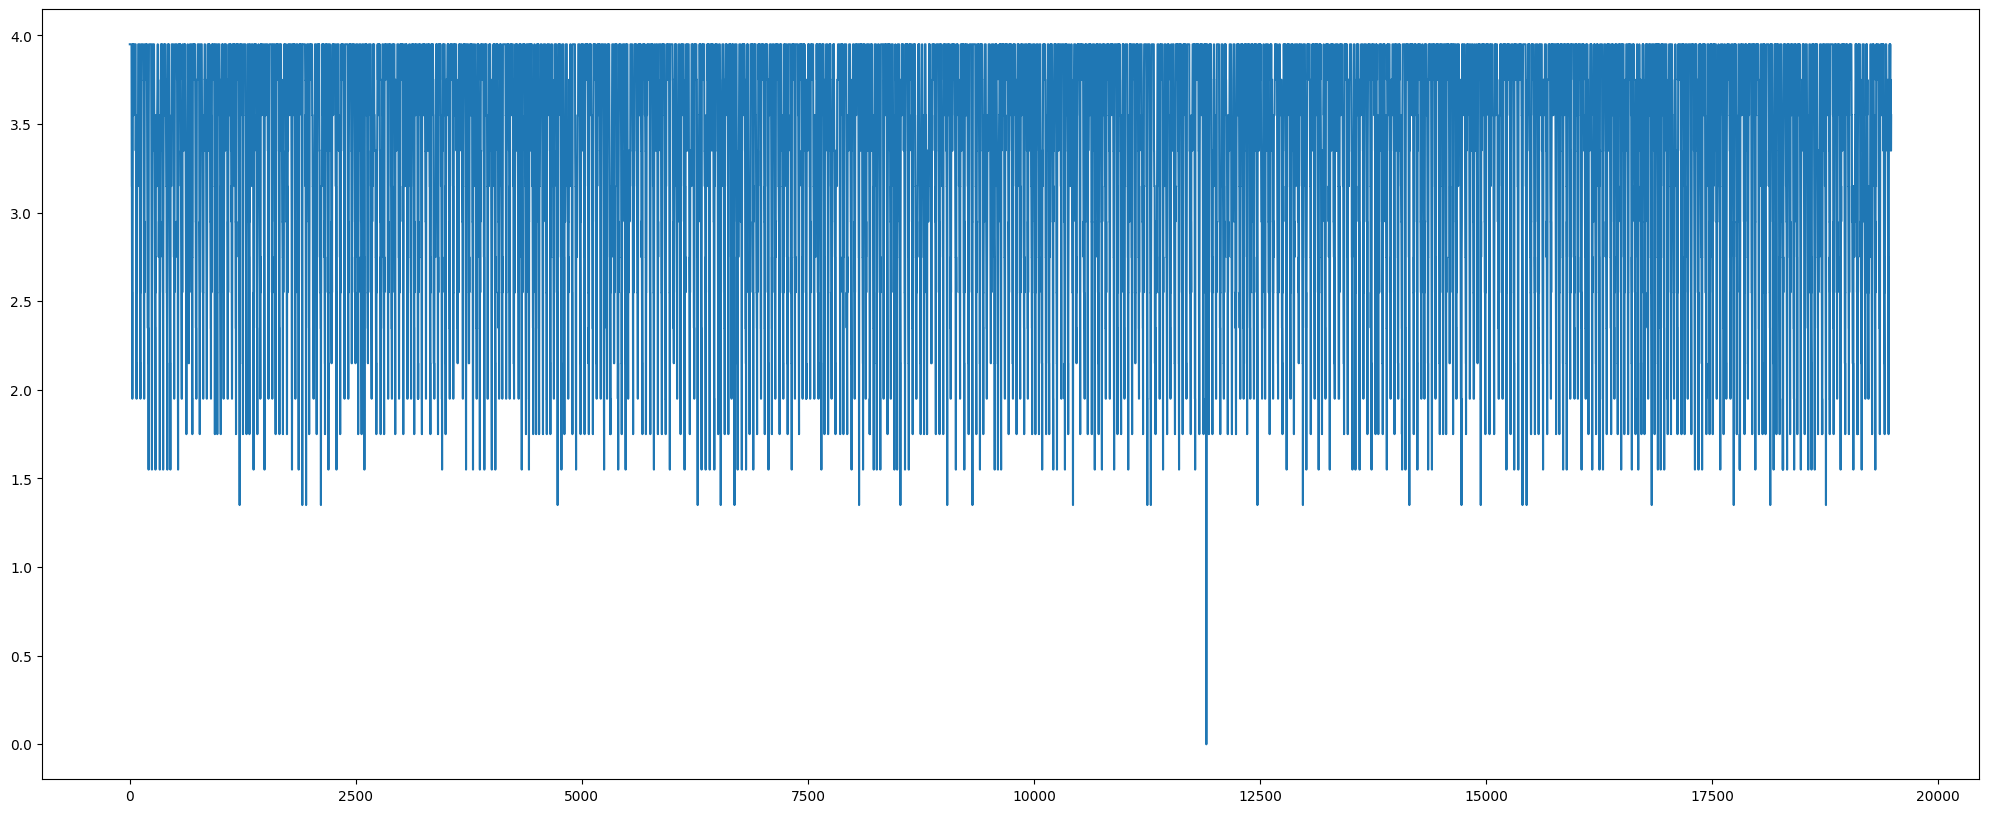

In [52]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_req_aj-aung-k8s-worker1'])
plt.show()

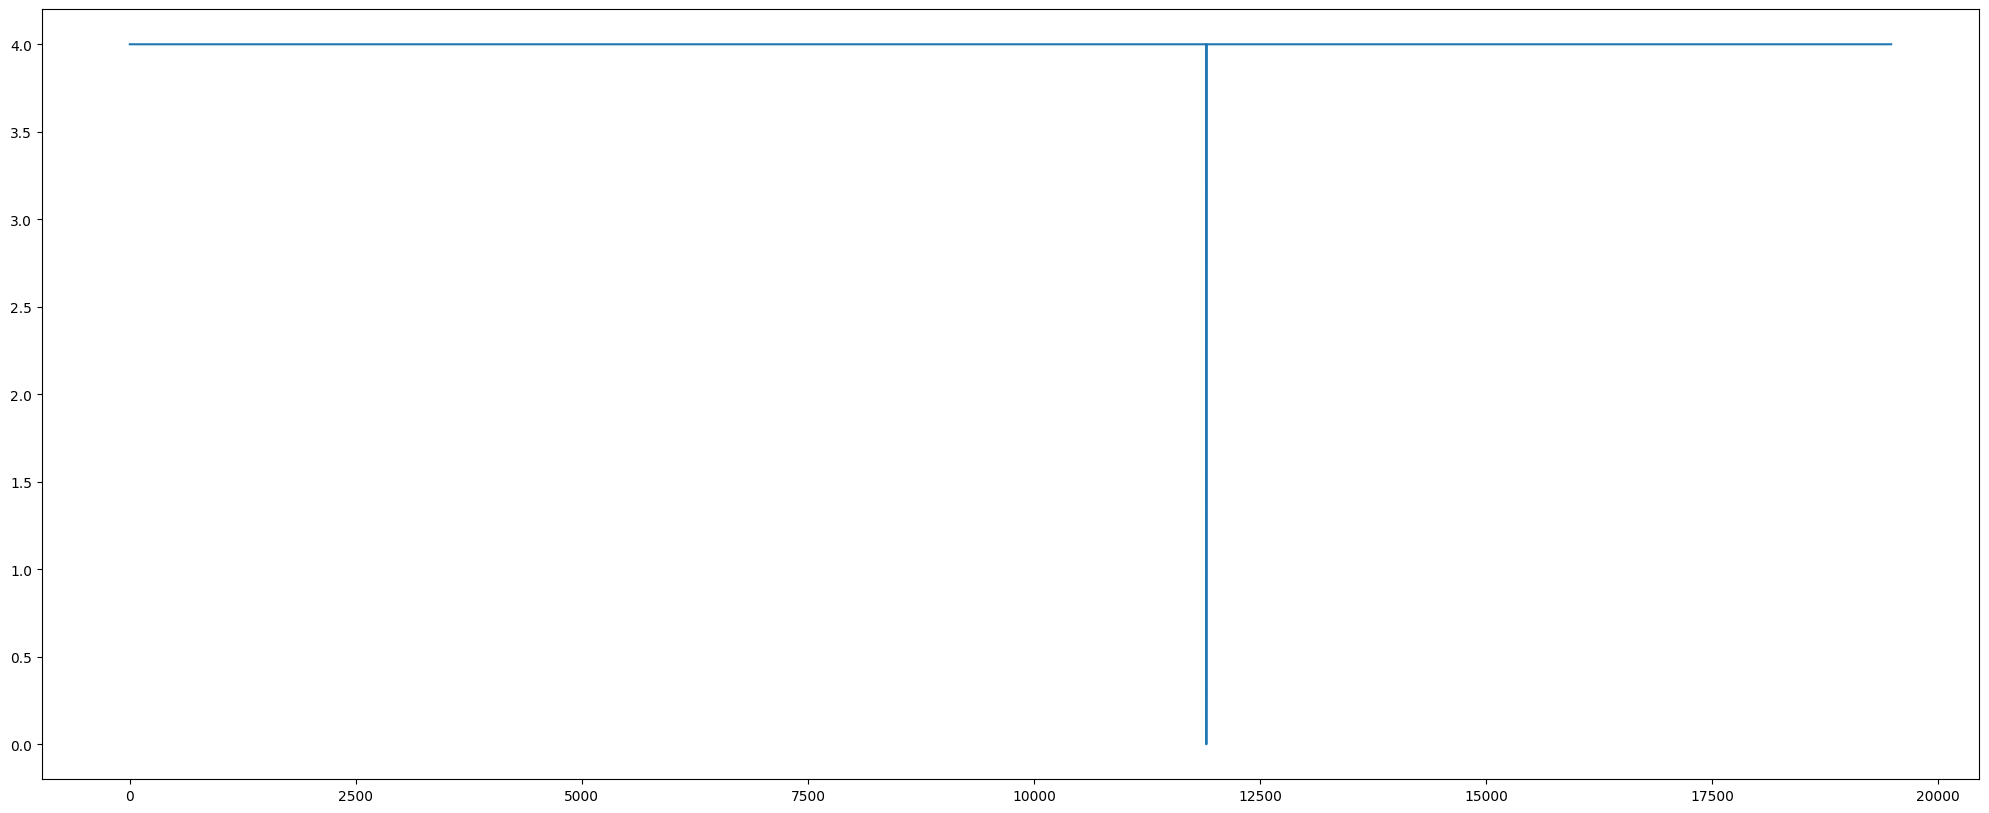

In [53]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_cap_aj-aung-k8s-worker1'])
plt.show()

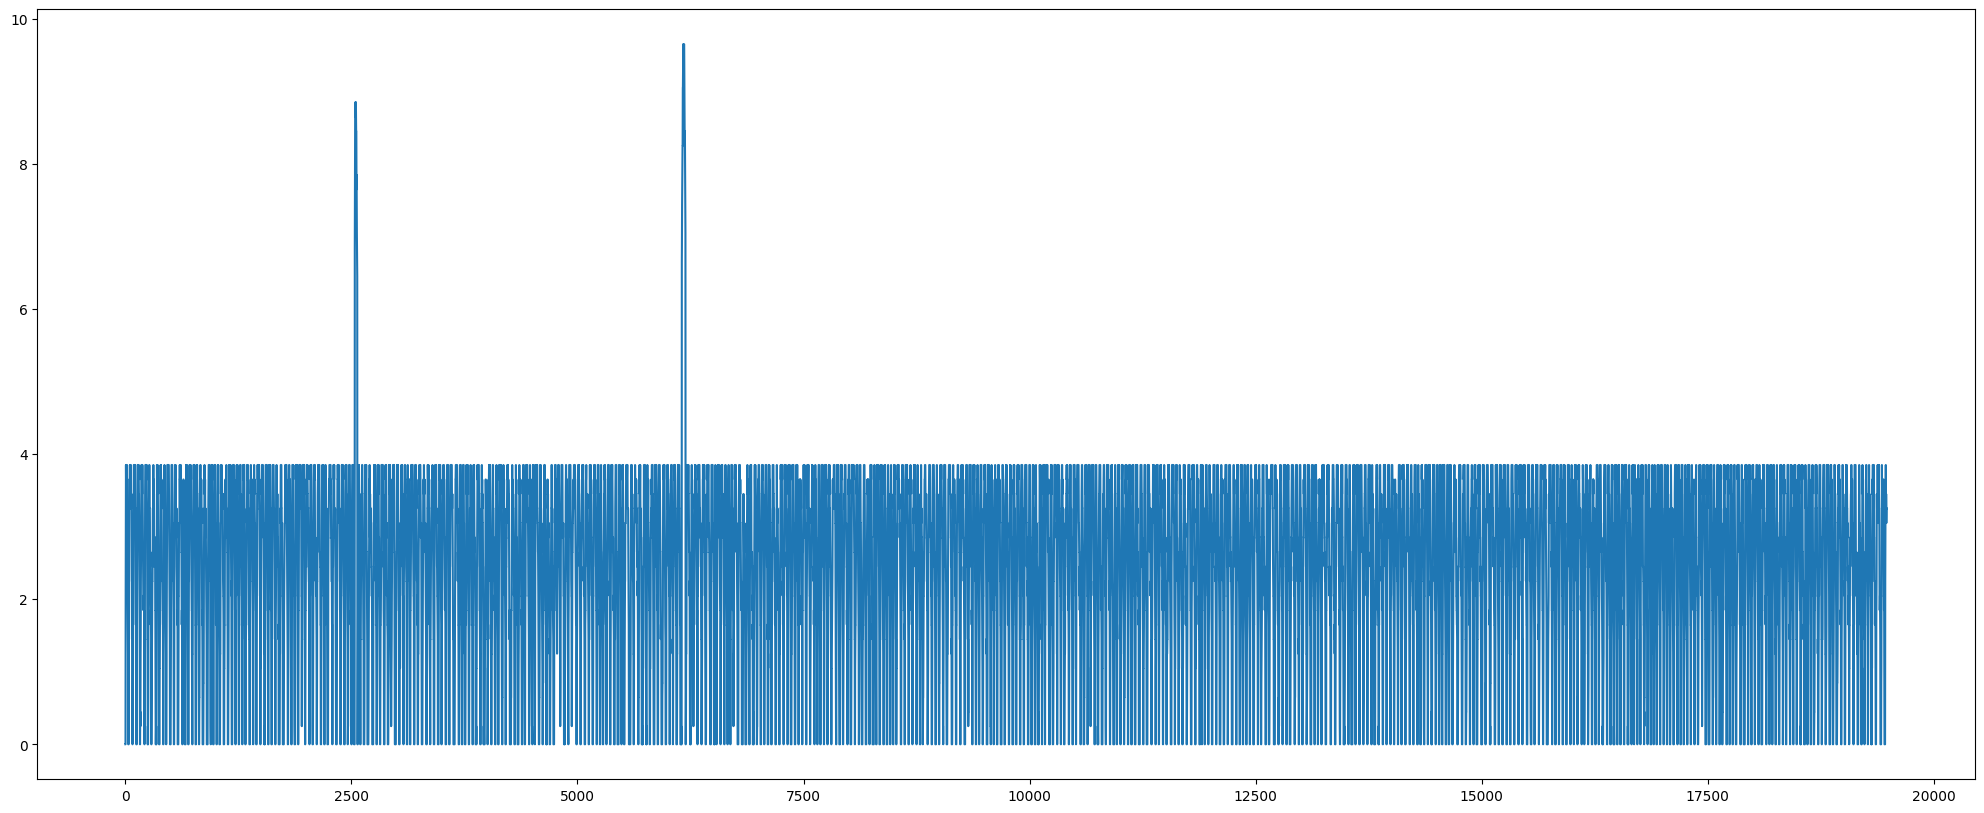

In [54]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_req_aj-aung-k8s-worker2'])
plt.show()

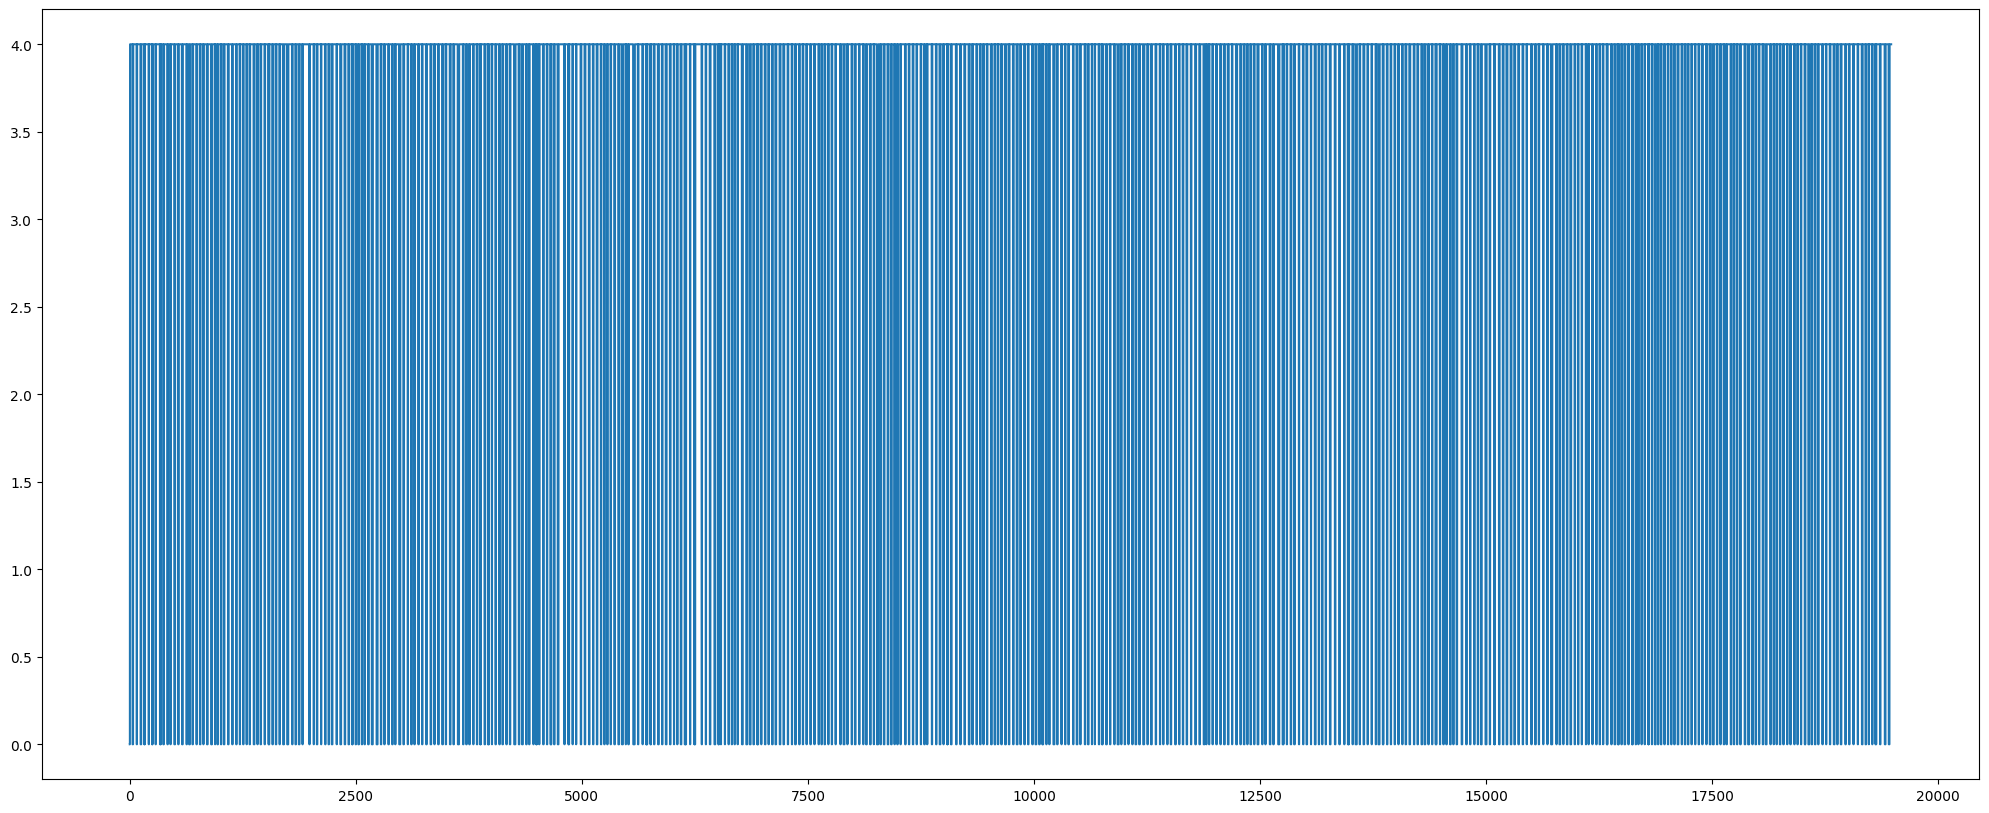

In [55]:
plt.figure(figsize = (25, 10))
plt.plot(df['node_cpu_cap_aj-aung-k8s-worker2'])
plt.show()

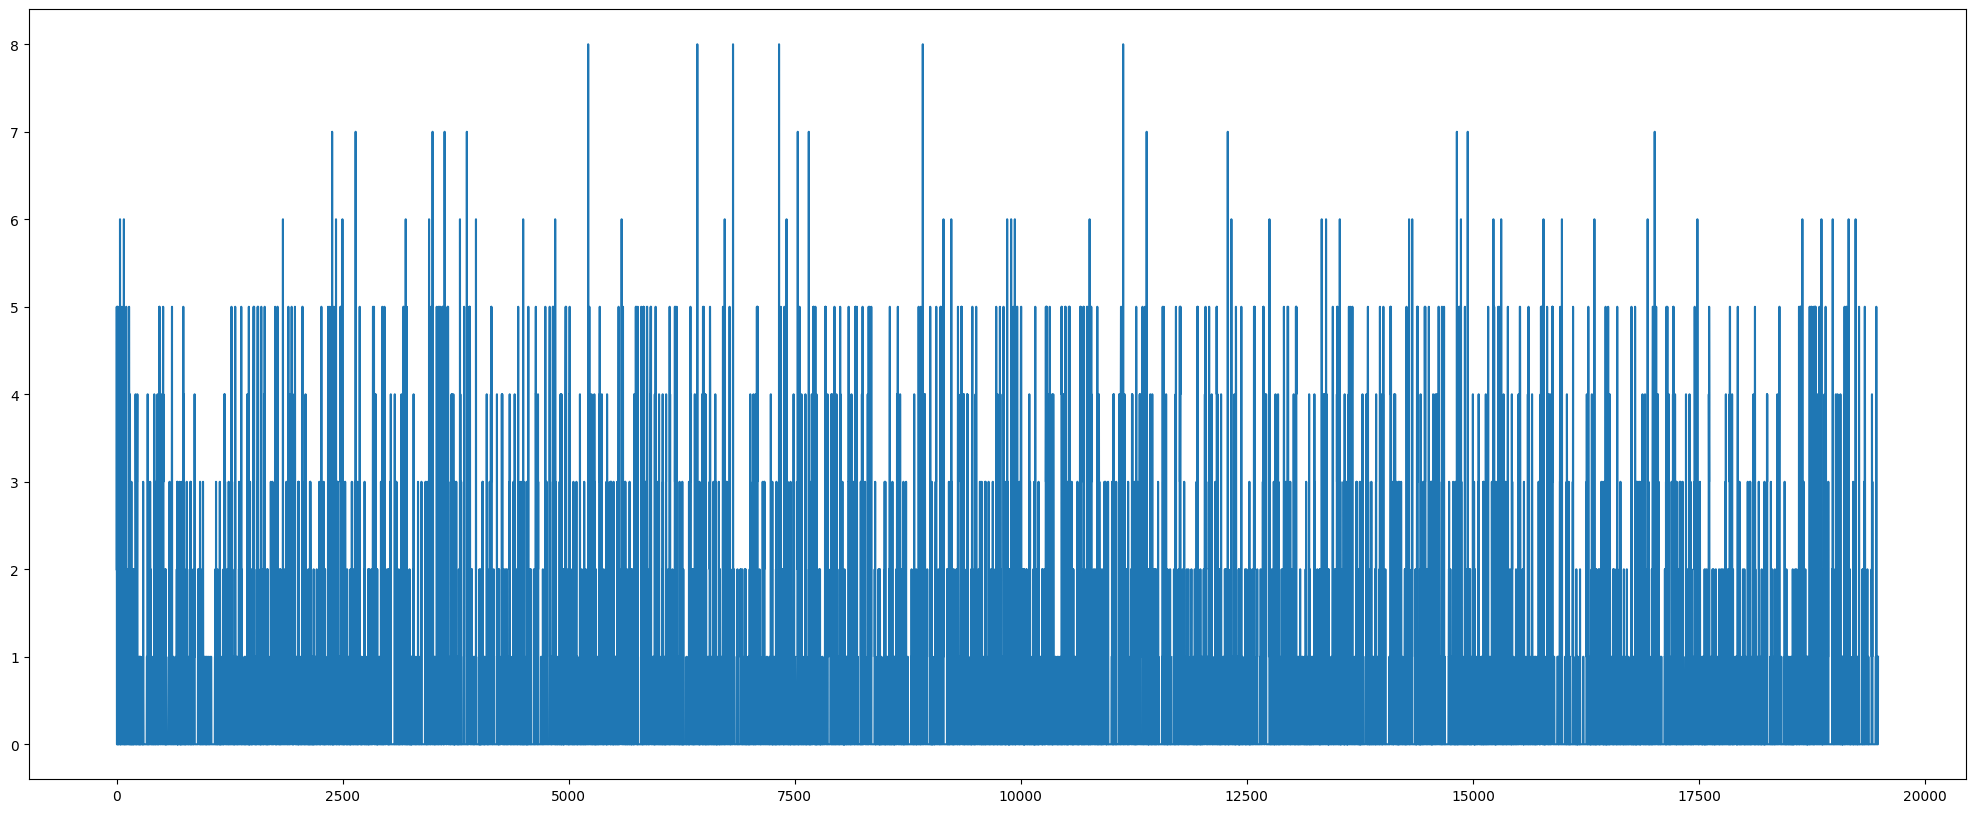

In [56]:
plt.figure(figsize = (25, 10))
plt.plot(df['cluster_pods_pending'])
plt.show()

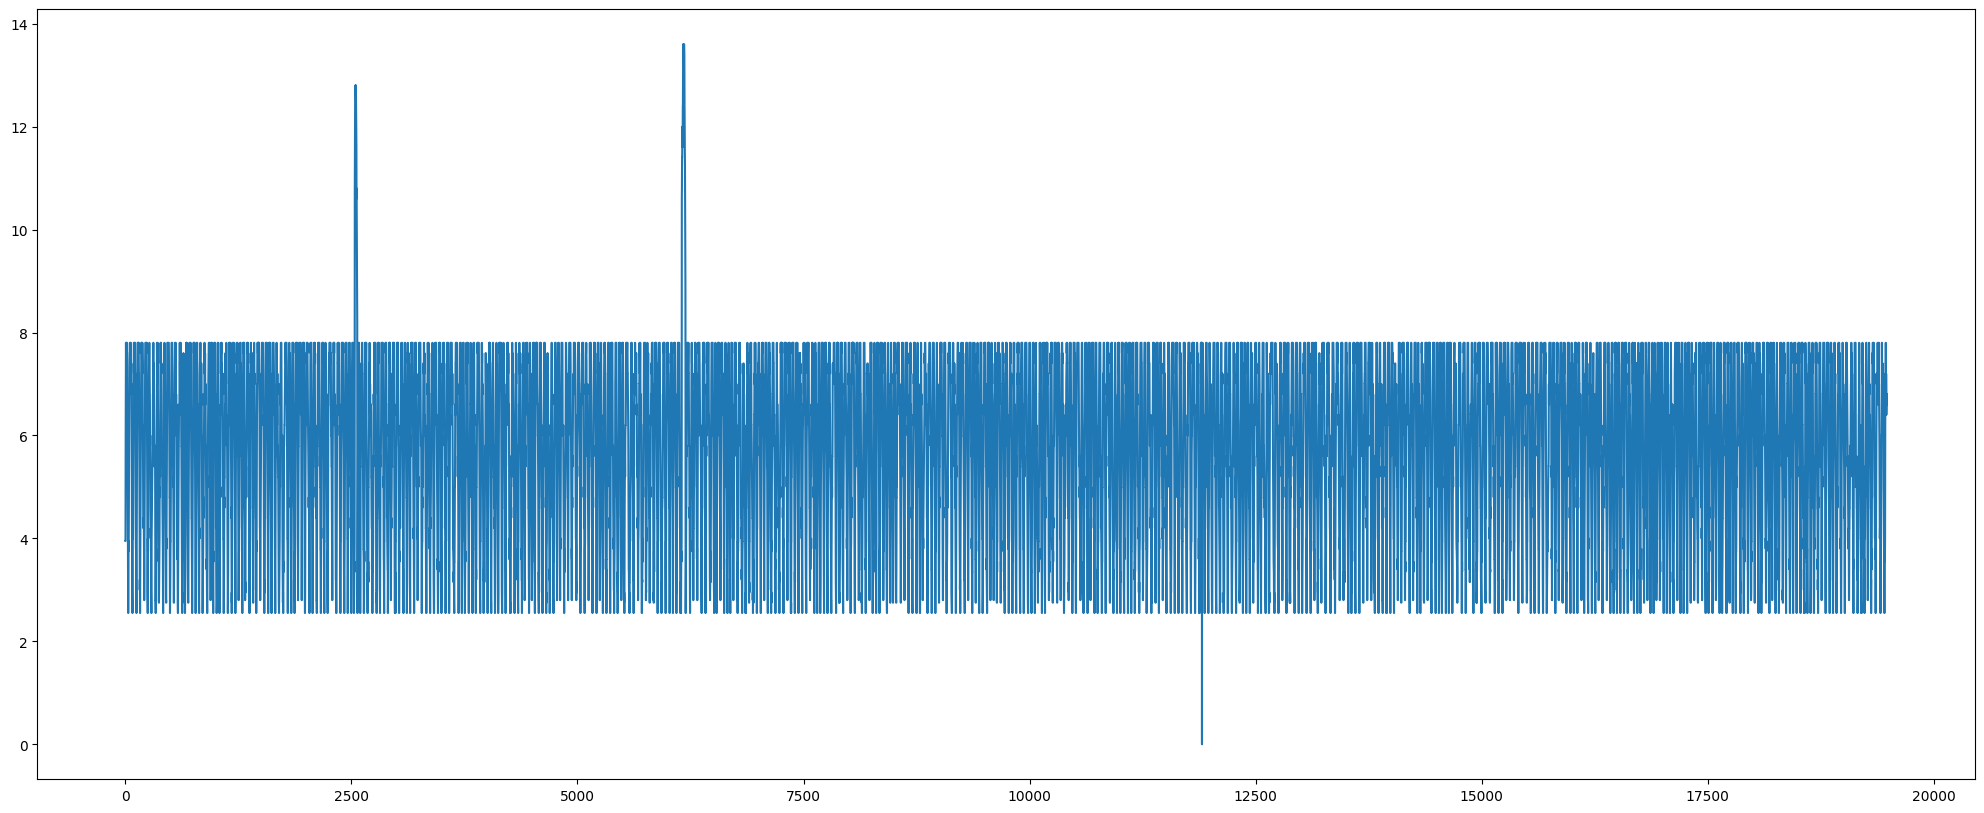

In [57]:
cluster_cpu_request = df['node_cpu_req_aj-aung-k8s-worker1'] + df['node_cpu_req_aj-aung-k8s-worker2']
plt.figure(figsize = (25, 10))
plt.plot(cluster_cpu_request)
plt.show()

Trial 10 Complete [00h 02m 28s]
val_loss: 0.0024414011277258396

Best val_loss So Far: 0.002296068239957094
Total elapsed time: 00h 53m 34s

Success: Hyperparameters logged to 'best_hyperparameters.log'
Training the final optimal model...
Epoch 1/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0110 - mae: 0.0779 - val_loss: 0.0037 - val_mae: 0.0476
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0045 - mae: 0.0519 - val_loss: 0.0032 - val_mae: 0.0449
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0039 - mae: 0.0486 - val_loss: 0.0029 - val_mae: 0.0423
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0036 - mae: 0.0465 - val_loss: 0.0029 - val_mae: 0.0428
Epoch 5/50
206/426 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - mae: 0.0445

426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0035 - mae: 0.0452 - val_loss: 0.0031 - val_mae: 0.0430
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0034 - mae: 0.0450 - val_loss: 0.0026 - val_mae: 0.0393
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0033 - mae: 0.0443 - val_loss: 0.0028 - val_mae: 0.0413
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0032 - mae: 0.0433 - val_loss: 0.0025 - val_mae: 0.0396
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0032 - mae: 0.0433 - val_loss: 0.0028 - val_mae: 0.0412
Epoch 10/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0032 - mae: 0.0436 - val_loss: 0.0041 - val_mae: 0.0507
Epoch 11/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0031 - mae: 0.0423 - val_loss: 0.0024 - val_mae: 0.0387
Epoch 12/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0030 - mae: 0.0421 - val_loss: 0.0026 - val_mae: 0.0413
Epoch 13/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - 

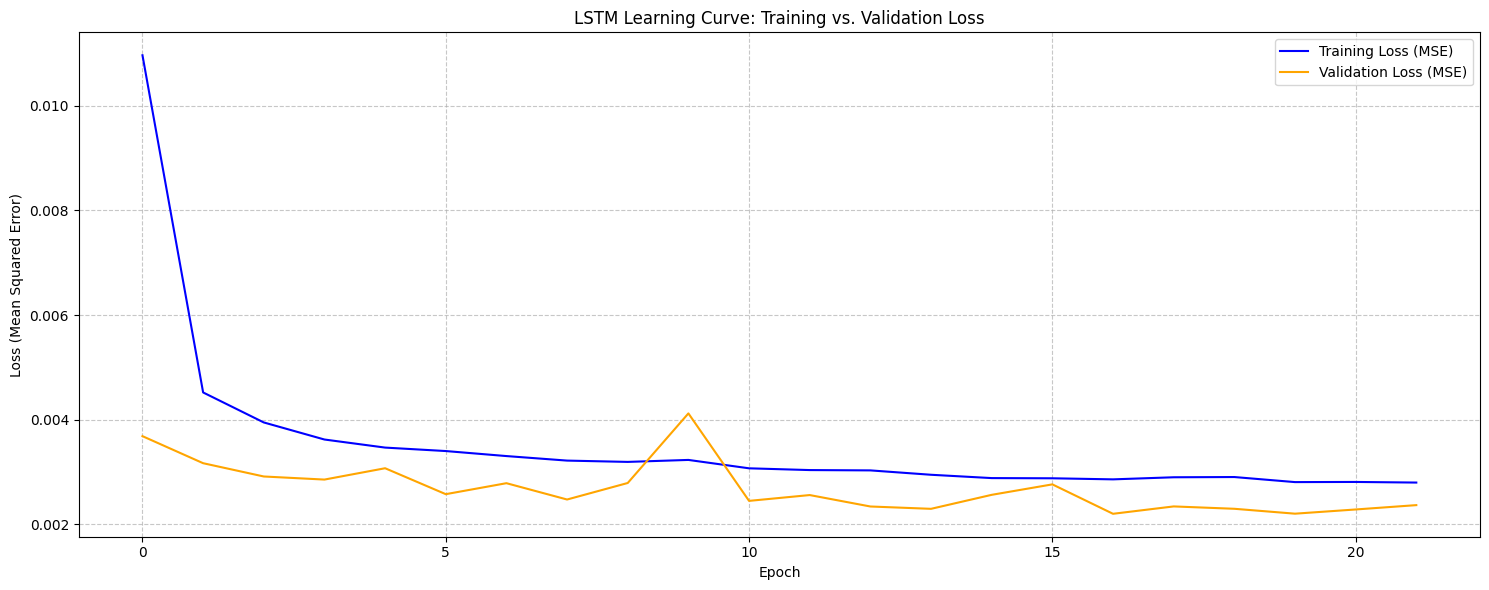

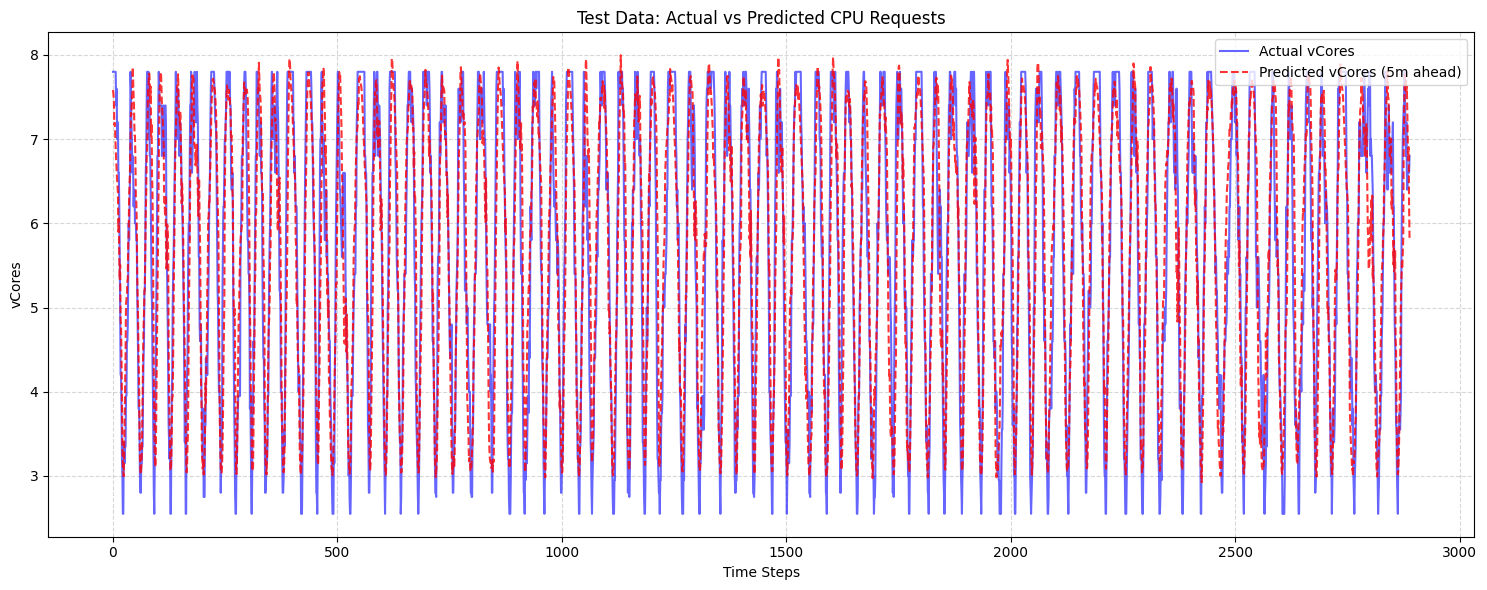

In [ ]:
raw_data = cluster_cpu_request.to_numpy().reshape(-1, 1)
n = len(raw_data)

train_raw = raw_data[:int(n * 0.7)]
val_raw = raw_data[int(n * 0.7):int(n * 0.85)]
test_raw = raw_data[int(n * 0.85):]

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_raw)
val_scaled = scaler.transform(val_raw)
test_scaled = scaler.transform(test_raw)

def array_to_X_y(data_array, window_size=30, forecast_horizon=5):
    X = []
    y = []
    for i in range(len(data_array) - window_size - forecast_horizon + 1):
        row = [[a[0]] for a in data_array[i:i + window_size]]
        X.append(row)
        label = data_array[i + window_size + forecast_horizon - 1][0]
        y.append(label)
    return np.array(X), np.array(y)

X_train, y_train = array_to_X_y(train_scaled, 30, 5)
X_val, y_val = array_to_X_y(val_scaled, 30, 5)
X_test, y_test = array_to_X_y(test_scaled, 30, 5)

print(f"Shapes - X_train: {X_train.shape}, y_train: {y_train.shape}")

# =====================================================================
# KERAS TUNER
# =====================================================================

def build_model(hp):
    model = Sequential()
    
    hp_units_1 = hp.Int('units_layer_1', min_value=16, max_value=128, step=16)
    num_layers = hp.Int('num_layers', 1, 2)
    return_seq = True if num_layers == 2 else False
    
    model.add(LSTM(units=hp_units_1, return_sequences=return_seq, input_shape=(X_train.shape[1], X_train.shape[2])))
    
    hp_dropout = hp.Float('dropout_rate', min_value=0.1, max_value=0.4, step=0.1)
    model.add(Dropout(hp_dropout))
    
    if num_layers == 2:
        hp_units_2 = hp.Int('units_layer_2', min_value=16, max_value=64, step=16)
        model.add(LSTM(units=hp_units_2, return_sequences=False))
        model.add(Dropout(hp_dropout))
        
    model.add(Dense(1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='mse', metrics=['mae'])
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='kubernetes_autoscaler_tuning',
    project_name='lstm_cpu_request'
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\nStarting the hyperparameter search...")
tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stop])

# =====================================================================
# BUILD, TRAIN, LOG, AND SAVE THE BEST MODEL
# =====================================================================
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Log the Hyperparameters
with open("best_hyperparameters.log", "w") as log_file:
    log_file.write("--- Optimal KerasTuner Hyperparameters ---\n")
    for param, value in best_hps.values.items():
        log_file.write(f"{param}: {value}\n")
print("\nSuccess: Hyperparameters logged to 'best_hyperparameters.log'")

# Build and train ONE final time
print("Training the final optimal model...")
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

best_model.save("best_single_var_model.keras")
print("Success: Model saved to 'best_single_var_model.keras'")

# =====================================================================
# 4. EVALUATION & PLOTTING
# =====================================================================

# The Final Exam: Test on hidden data
print("\nRunning final evaluation on unseen test data...")
scaled_predictions = best_model.predict(X_test)

# Inverse transform to get real vCore counts
real_predictions = scaler.inverse_transform(scaled_predictions)
real_actuals = scaler.inverse_transform(y_test.reshape(-1, 1))

# Official metrics
rmse = np.sqrt(mean_squared_error(real_actuals, real_predictions))
mae = mean_absolute_error(real_actuals, real_predictions)

print("\n--- OFFICIAL AUTOSCALER PERFORMANCE ---")
print(f"Test RMSE: {rmse:.2f} vCores")
print(f"Test MAE:  {mae:.2f} vCores")
print(f"On average, the model's 5-minute forecast is off by {mae:.2f} vCores.")

# Plot Training vs Validation Loss
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', color='orange')
plt.title('LSTM Learning Curve: Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Plot Predictions vs Reality on the Test Set
plt.figure(figsize=(15, 6))
plt.plot(real_actuals, label='Actual vCores', color='blue', alpha=0.6)
plt.plot(real_predictions, label='Predicted vCores (5m ahead)', color='red', linestyle='--', alpha=0.8)
plt.title('Test Data: Actual vs Predicted CPU Requests')
plt.xlabel('Time Steps')
plt.ylabel('vCores')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()